In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

# Przygotowanie danych

### W ramach przygotowania danych zebrałam wyniki dla komitetów, których analiza dla mnie jest nieistotna do jednej grupy 'pozostałe_komitety'. Dodałam trzy kolumny: kolumnę z wynikami procentowymi dla poszczególnych komitetów, kolumnę z frekwencją oraz kolumnę która określa czy dany obszar to miasto, gmina (inna niż gmina miejska) oraz zagranica.

In [11]:
df = pd.read_csv("./obwody.csv" , delimiter=';')

In [12]:
pozostałe_komitety = ['KOMITET WYBORCZY BEZPARTYJNI SAMORZĄDOWCY', 'KOMITET WYBORCZY POLSKA JEST JEDNA',
       'KOMITET WYBORCZY WYBORCÓW RUCHU DOBROBYTU I POKOJU',
       'KOMITET WYBORCZY NORMALNY KRAJ', 'KOMITET WYBORCZY ANTYPARTIA',
       'KOMITET WYBORCZY RUCH NAPRAWY POLSKI',
       'KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA']
df['POZOSTAŁE KOMITETY']= df[pozostałe_komitety].sum(axis=1)

In [13]:
df['trzecia_droga_%'] = round(100*df['KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE']/ 
                              df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)
df['nowa_lewica_%'] = round(100*df['KOMITET WYBORCZY NOWA LEWICA']/ 
                            df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)
df['pis_%'] = round(100*df['KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ']/ 
                    df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)
df['konfederacja_%'] = round(100*df['KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ']/ 
                             df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)
df['ko_%'] = round(100*df['KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI']/ 
                   df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)
df['pozostałe_komitety_%'] = round(100*df['POZOSTAŁE KOMITETY']/ 
                                   df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)

In [14]:
df['Gmina']=df['Gmina'].astype(str)

In [15]:
df['Frekwencja_%'] = round(100*df['Liczba wyborców, którym wydano karty do głosowania w lokalu wyborczym oraz w głosowaniu korespondencyjnym (łącznie)']/
                           df['Liczba wyborców uprawnionych do głosowania'],2)

In [16]:
df['Lokalizacja'] = ''
df['Lokalizacja'] = df['Lokalizacja'].astype('str')
df.loc[df['Gmina'].str.startswith('gm.'), 'Lokalizacja'] = 'gmina'
df.loc[(df['Gmina'].str.startswith('m.'))|(df['Powiat'].str.contains('Warszawa')), 'Lokalizacja' ] = 'miasto'
df.loc[~(df['Gmina'].str.startswith('gm.') | df['Gmina'].str.startswith('m.') | df['Powiat'].str.contains('Warszawa')), 'Lokalizacja'] = 'zagranica'

# Podział wyników wyborów na miasta, gminy i zagranicę
Wyniki zostaną wyznaczone z ilości głosów z każdej komisji wyborczej 

In [17]:
głosy_miasta = df[(df['Gmina'].str.startswith('m.')) | (df['Powiat'].str.contains('Warszawa'))]
głosy_gminy = df[df['Gmina'].str.startswith('gm.')]
głosy_zagranica = df[~(df['Gmina'].str.startswith('gm.') | df['Gmina'].str.startswith('m.') | df['Powiat'].str.contains('Warszawa'))]

In [18]:
labels = [
       'KOALICYJNY KOMITET WYBORCZY \nTRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI \n - POLSKIE STRONNICTWO LUDOWE',
       'KOMITET WYBORCZY\n NOWA LEWICA',
       'KOMITET WYBORCZY \n PRAWO I SPRAWIEDLIWOŚĆ',
       'KOMITET WYBORCZY \n KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ',
       'KOALICYJNY KOMITET WYBORCZY \n KOALICJA OBYWATELSKA PO .N IPL ZIELONI', 'POZOSTAŁE KOMITETY'
       ]

In [19]:
komitety = [
       'KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE',
       'KOMITET WYBORCZY NOWA LEWICA',
       'KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ',
       'KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ',
       'KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI',
       'POZOSTAŁE KOMITETY']

In [20]:
wynik_miasta =  głosy_miasta[komitety].sum()
wynik_gminy = głosy_gminy[komitety].sum()
wynik_zagranica = głosy_zagranica[komitety].sum()

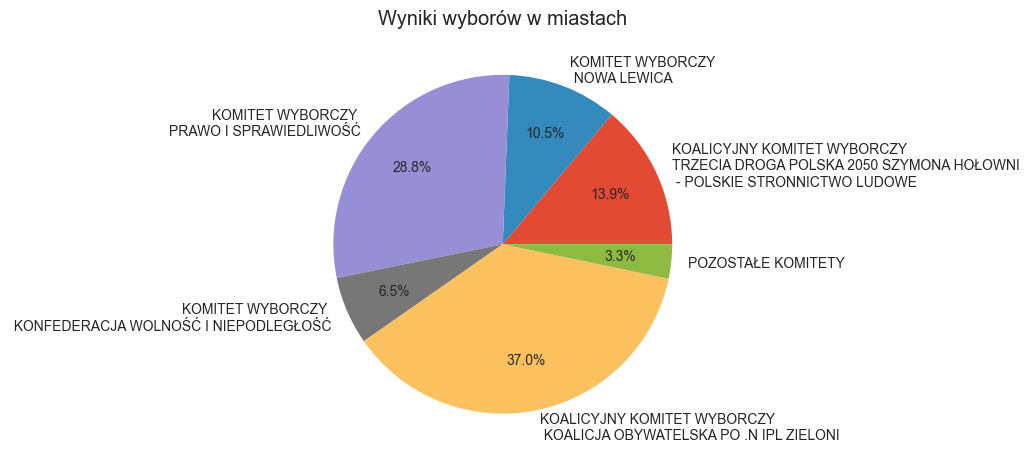

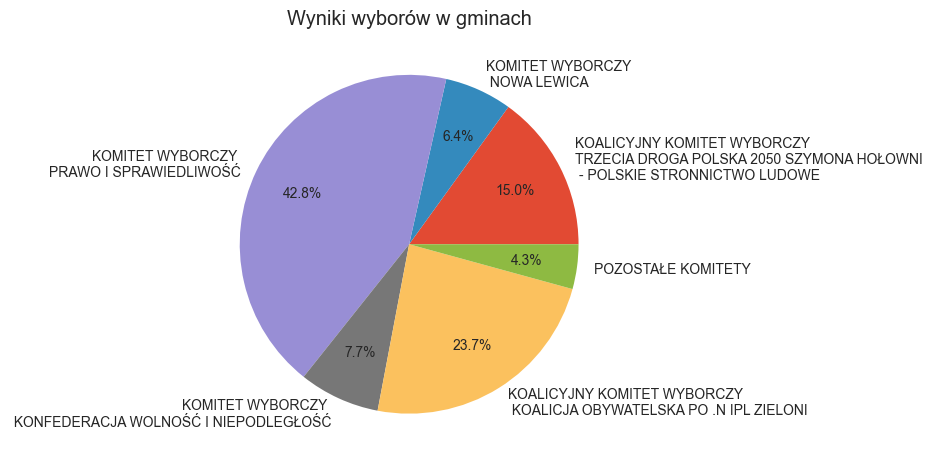

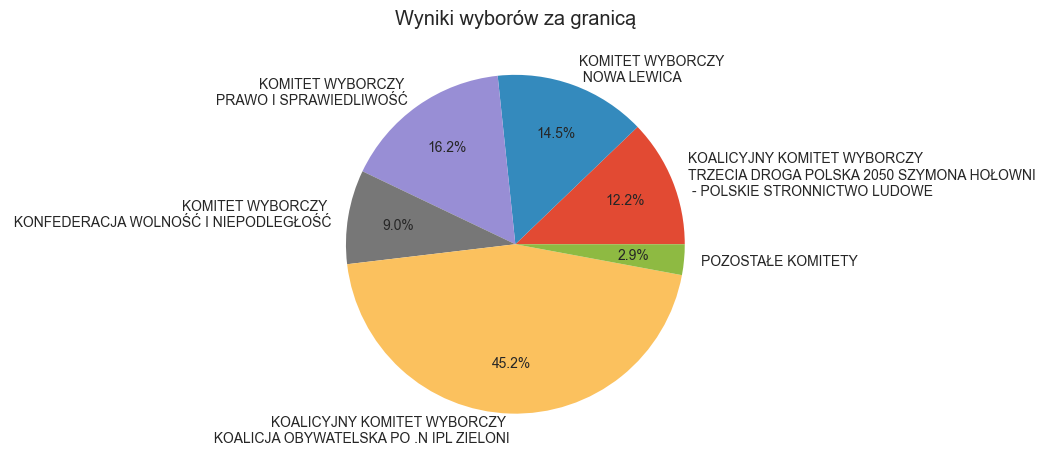

In [23]:
ax_miasta = wynik_miasta.plot.pie(autopct='%1.1f%%', labels=labels, pctdistance=0.7)
ax_miasta.set_title("Wyniki wyborów w miastach")
plt.show()

ax_gminy = wynik_gminy.plot.pie(autopct='%1.1f%%', labels=labels, pctdistance=0.7)
ax_gminy.set_title("Wyniki wyborów w gminach")
plt.show()

ax_zagranica = wynik_zagranica.plot.pie(autopct='%1.1f%%', labels=labels, pctdistance=0.7)
ax_zagranica.set_title("Wyniki wyborów za granicą")
plt.show()

### Pytanie: co miało wpływ na takie rozbieżności w wynikach wyborów.
#### Założenie: może elektrorat do którego próbowały dotrzeć poszczególne komitety ma różne zagęszczenie w miastach i gminach, np. młodzi ludzie 
#### Założenie: może frekwencja różniła się w tych obszarach

# Frekwencja w miastach, gminach i za granicą 

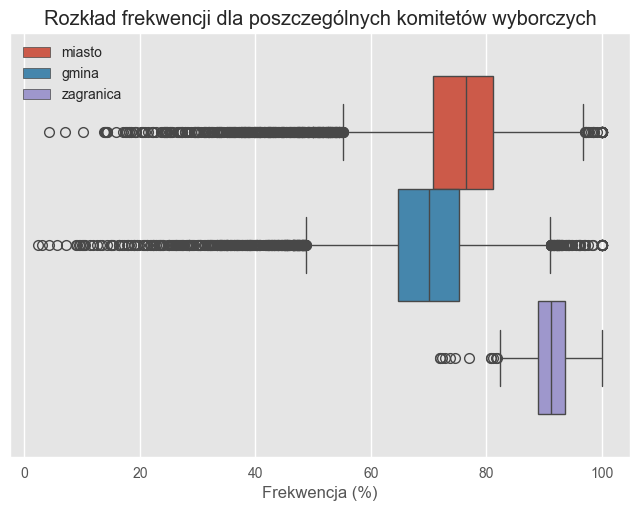

In [32]:
sns.boxplot(data=df, x="Frekwencja_%", hue="Lokalizacja")
plt.title('Rozkład frekwencji dla poszczególnych komitetów wyborczych')
plt.xlabel('Frekwencja (%)')
plt.legend()
plt.show()

### Na powyższym wykresie widać dużo outlierów, które w dużym stopniu pochodzą z bardzo małych komisji wyborczych, takich jak np. szpitale czy punkty opieki. W celu lepszego zobrazowania rozkładu frekwencji pogrupowano dane na gminy, tj. jeden punkt na wykresie będzie odnosił się do jednej gminy, a nie do pojedynczej komisji wyborczej.

In [24]:
grouped_df = df.groupby(['Gmina','Lokalizacja','Powiat'])[
    ['Liczba wyborców, którym wydano karty do głosowania w lokalu wyborczym oraz w głosowaniu korespondencyjnym (łącznie)',
     'Liczba wyborców uprawnionych do głosowania',
     'Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów', 
     'KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE',
     'KOMITET WYBORCZY NOWA LEWICA',
     'KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ',
     'KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ',
     'KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI',
     'POZOSTAŁE KOMITETY']
].sum().reset_index()

grouped_df['Frekwencja_gminy_%'] = round(100*grouped_df['Liczba wyborców, którym wydano karty do głosowania w lokalu wyborczym oraz w \
głosowaniu korespondencyjnym (łącznie)']/ grouped_df['Liczba wyborców uprawnionych do głosowania'],2)

grouped_df['trzecia_droga_%'] = round(100*grouped_df['KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE']/ 
                              grouped_df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)
grouped_df['nowa_lewica_%'] = round(100*grouped_df['KOMITET WYBORCZY NOWA LEWICA']/ 
                            grouped_df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)
grouped_df['pis_%'] = round(100*grouped_df['KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ']/ 
                    grouped_df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)
grouped_df['konfederacja_%'] = round(100*grouped_df['KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ']/ 
                             grouped_df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)
grouped_df['ko_%'] = round(100*grouped_df['KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI']/ 
                   grouped_df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)
grouped_df['pozostałe_komitety_%'] = round(100*grouped_df['POZOSTAŁE KOMITETY']/ 
                                   grouped_df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)

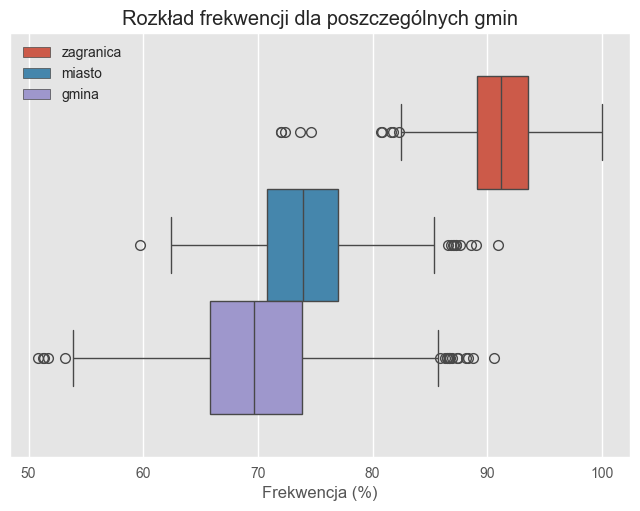

In [45]:
sns.boxplot(data=grouped_df, x="Frekwencja_gminy_%", hue="Lokalizacja")
plt.title('Rozkład frekwencji dla poszczególnych gmin')
plt.xlabel('Frekwencja (%)')
plt.legend()
plt.show()

# Jak kształtowało się poparcie dla PiSu i KO ?

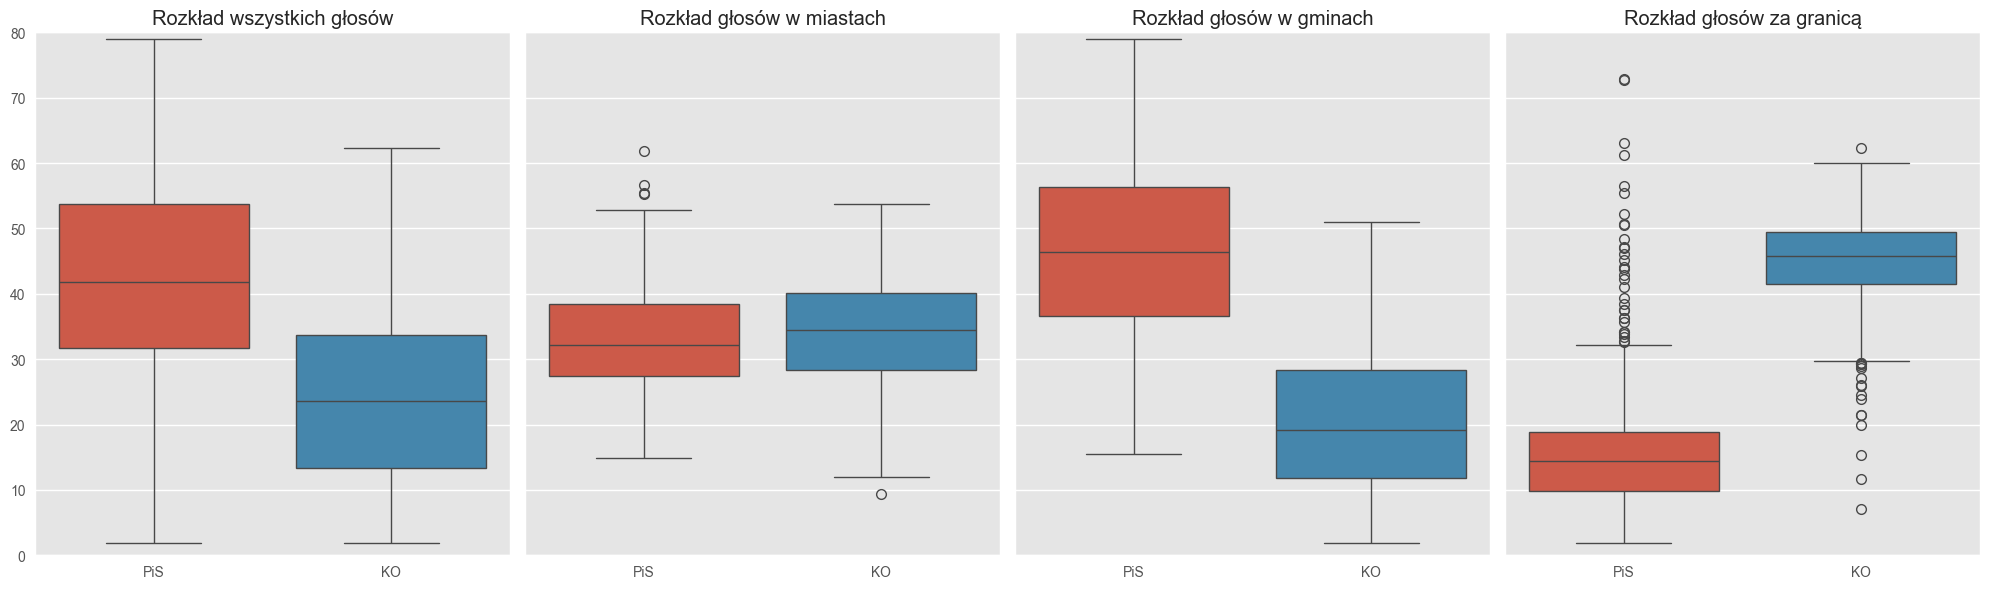

In [53]:
miasta = grouped_df[grouped_df['Lokalizacja']=='miasto']
gminy = grouped_df[grouped_df['Lokalizacja']=='gmina']
zagranica = grouped_df[grouped_df['Lokalizacja']=='zagranica']
labels = ['PiS', 'KO']

fig, axs = plt.subplots(1, 4, figsize=(20, 6), sharey=True) 

sns.boxplot(data=grouped_df[['pis_%', 'ko_%']], ax=axs[0])
axs[0].set_xticks(range(len(labels)))  
axs[0].set_xticklabels(labels)
axs[0].set_ylim(0, 80)
axs[0].set_title('Rozkład wszystkich głosów')

sns.boxplot(data=miasta[['pis_%', 'ko_%']], ax=axs[1])
axs[1].set_xticks(range(len(labels)))  
axs[1].set_xticklabels(labels)
axs[1].set_ylim(0, 80)
axs[1].set_title('Rozkład głosów w miastach')

sns.boxplot(data=gminy[['pis_%', 'ko_%']], ax=axs[2])
axs[2].set_xticks(range(len(labels)))  
axs[2].set_xticklabels(labels)
axs[2].set_ylim(0, 80)
axs[2].set_title('Rozkład głosów w gminach')

sns.boxplot(data=zagranica[['pis_%', 'ko_%']], ax=axs[3])
axs[3].set_xticks(range(len(labels)))  
axs[3].set_xticklabels(labels)
axs[3].set_ylim(0, 80)
axs[3].set_title('Rozkład głosów za granicą')

plt.tight_layout()
plt.show()

### Wnioski
#### W miastach wynik całkowity KO wyniósł 37%, a PiS 28,8%, natomiast rozkład głosów poszczególnych miast dla obu komitetów był bardzo podobny tzn. wartość średnia dla KO to 34%, a dla PiS 33%. Wniosek: KO miało większe poparcie w dużych miastach, a PiS w mniejszych. Rozkład głosów w przypadku obu komitetów nie był szeroki tzn. nie było miast gdzie któryś komitet otrzymał zdecydowanie większe poparcie (max dla PiS to 61,88%, max dla KO to 53,72%)

# Czym charakteryzowały się obszary za granicą, w których odnotowano bardzo wysokie poparcie dla PiS i bardzo niskie dla KO?

In [71]:
# ustanienie progu, za którym uznajemy poparcie dla PiS za wysokie
q1 = zagranica["pis_%"].quantile(0.25)
q2 = zagranica["pis_%"].quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5*IQR)

In [72]:
# ustanienie progu, za którym uznajemy poparcie dla KO za niskie
q1 = zagranica["ko_%"].quantile(0.25)
q2 = zagranica["ko_%"].quantile(0.75)
IQR = q2 - q1
min_limit = q1 - (1.5*IQR)

## Ile osób głosowało w takich obszarach? 

In [75]:
zagranica_wysoko_pis = zagranica[zagranica['pis_%']>max_limit]
zagranica_nisko_ko = zagranica[zagranica['ko_%']<min_limit]
zagranica_wysoko_pis_nisko_ko = zagranica[(zagranica['pis_%']>max_limit) & (zagranica['ko_%']<min_limit)]
średnia_ilość_głosów_zagranica = round(zagranica['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'].mean(),0)
średnia_ilość_głosów_zagranica_wysoko_pis_nisko_ko = round(zagranica_wysoko_pis_nisko_ko\
['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'].mean(),0)

print(f'Średnia ilość głosów oddanych za granicą: {średnia_ilość_głosów_zagranica}')
print(f'Średnia ilość głosów oddanych za granicą w gminach o wysokim poparciu PiS i niskim KO: {średnia_ilość_głosów_zagranica_wysoko_pis_nisko_ko}')


Średnia ilość głosów oddanych za granicą: 1892.0
Średnia ilość głosów oddanych za granicą w gminach o wysokim poparciu PiS i niskim KO: 1877.0


### Wniosek: nie widać aby liczba głosów w gminach z wysokim poparcie PiS i niskim KO odbiegała od średniej liczby głosów we wszystich zagranicznych 'gmianch'

## W jakich krajach znajdowaly się obszary, w których odnotowano wysokie popoarcie dla PiS i niskie dla KO?

In [65]:
kraje_wysoko_pis_nisko_ko = zagranica[(zagranica['pis_%']>max_limit) & (zagranica['ko_%']<min_limit)][
['Gmina','Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów']]

In [69]:
# z pomocą ChatGPT uzupenilam nazwy obszarów wyborczych o kraje w których się znajdują

lista_krajow = pd.DataFrame([
    ('Aulnay-sous-Bois', 'Francja'),
    ('Bridgeview', 'Stany Zjednoczone'),
    ('Chicago', 'Stany Zjednoczone'),
    ('Lemont', 'Stany Zjednoczone'),
    ('Lombard', 'Stany Zjednoczone'),
    ('Mississauga', 'Kanada'),
    ('Munster', 'Stany Zjednoczone'),
    ('Niles', 'Stany Zjednoczone'),
    ('Novo Selo', 'Bułgaria'),
    ('Passaic', 'Stany Zjednoczone'),
    ('Willow Springs', 'Stany Zjednoczone')
], columns=['Gmina', 'Kraj'])
kraje_wysoko_pis_nisko_ko_liczba_głosów = pd.merge(lista_krajow, kraje_wysoko_pis_nisko_ko, on='Gmina', how='inner')

### Największe poparcie PiSu (a najmniejsze KO) za granicą jest w Ameryce (USA i Kanada).

# Jak głosowały obszary (miasta, gminy, zagranica), w których frekwencja była najwyższa. 
### Z rozkładu frekwencji wyznaczymy najpierw próg, od którego frekwencję będziemy uznawać za wysoką.

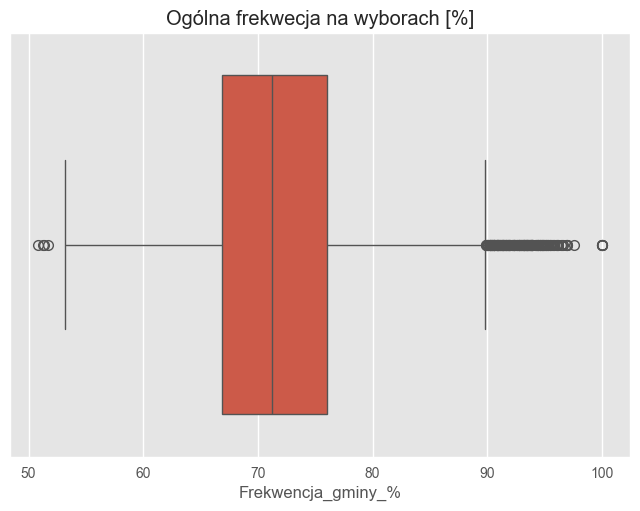

In [54]:
sns.boxplot(data=grouped_df, x='Frekwencja_gminy_%')
plt.title('Ogólna frekwecja na wyborach [%]')
plt.show()

In [234]:
grouped_df['Frekwencja_gminy_%'].quantile([0.25, 0.5, 0.75])

0.25    66.86
0.50    71.25
0.75    76.06
Name: Frekwencja_gminy_%, dtype: float64

### Za wysoką frekwencję przyjmiemy przedział powyżej 76.06% frekwencji, ta grupa stanowi 25% głosujących gmin. 

In [56]:
grouped_df['trzecia_droga_%'] = round(100*grouped_df['KOALICYJNY KOMITET WYBORCZY TRZECIA DROGA POLSKA 2050 SZYMONA HOŁOWNI - POLSKIE STRONNICTWO LUDOWE']/ 
                              grouped_df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)
grouped_df['nowa_lewica_%'] = round(100*grouped_df['KOMITET WYBORCZY NOWA LEWICA']/ 
                            grouped_df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)
grouped_df['pis_%'] = round(100*grouped_df['KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ']/ 
                    grouped_df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)
grouped_df['konfederacja_%'] = round(100*grouped_df['KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ']/ 
                             grouped_df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)
grouped_df['ko_%'] = round(100*grouped_df['KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI']/ 
                   grouped_df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)
grouped_df['pozostałe_komitety_%'] = round(100*grouped_df['POZOSTAŁE KOMITETY']/ 
                                   grouped_df['Liczba głosów ważnych oddanych łącznie na wszystkie listy kandydatów'],2)

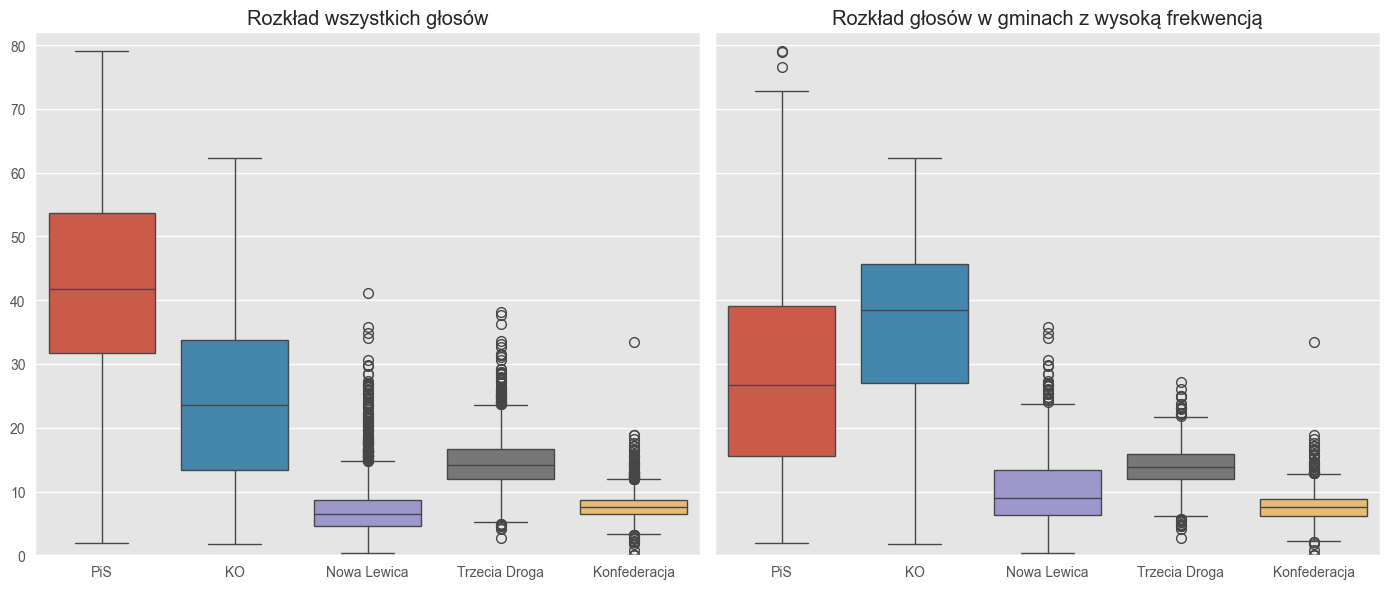

In [60]:
labels = ['PiS', 'KO', 'Nowa Lewica', 'Trzecia Droga', 'Konfederacja']

fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # 1 wiersz, 2 kolumny

sns.boxplot(data=grouped_df[['pis_%','ko_%','nowa_lewica_%','trzecia_droga_%','konfederacja_%']], ax=axs[0])
axs[0].set_xticks(range(len(labels)))  
axs[0].set_xticklabels(labels)
axs[0].set_ylim(0, 82)
axs[0].set_title('Rozkład wszystkich głosów')

sns.boxplot(data=grouped_df.query('`Frekwencja_gminy_%` > 76.06')[['pis_%','ko_%','nowa_lewica_%','trzecia_droga_%','konfederacja_%']], ax=axs[1])
axs[1].set_xticks(range(len(labels)))  
axs[1].set_xticklabels(labels)
axs[1].set_ylim(0, 82)
axs[1].set_title('Rozkład głosów w gminach z wysoką frekwencją')

plt.tight_layout()
plt.show()


## Porównując te dwa wykresy widać odwrócenie prowadzenia pomiędzy PiS i KO. Może to świadczyć o większej motywacji do głosowania wśód zwolenników opozycji.


# Czy są i jakie są zależności pomiędzy wynikami poszczególnych komitetów. Czy w wynikach będzie widoczne które komitety mają wspólny elektrorat, a które zupełnie przeciwny?

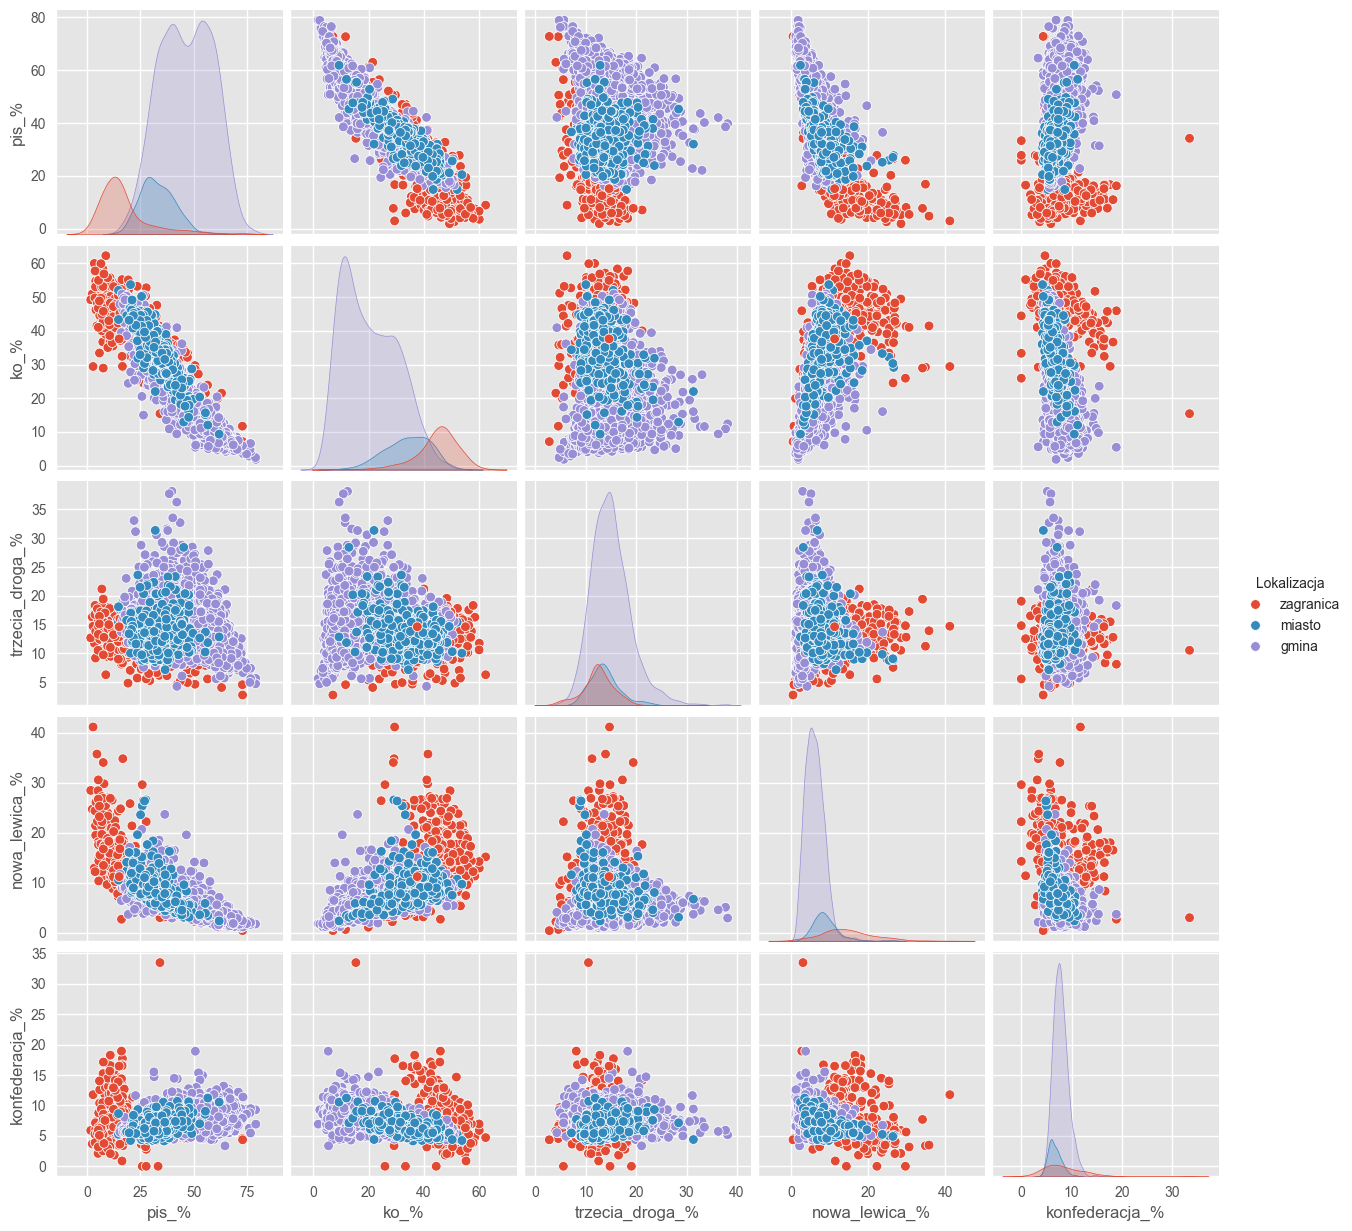

In [61]:
sns.pairplot(grouped_df, vars=['pis_%','ko_%','trzecia_droga_%','nowa_lewica_%','konfederacja_%'], hue='Lokalizacja')
plt.show()

In [225]:
grouped_df[['pis_%','ko_%','trzecia_droga_%','nowa_lewica_%','konfederacja_%']].corr()

,pis_%,ko_%,trzecia_droga_%,nowa_lewica_%,konfederacja_%
pis_%,1.000000,-0.935823,-0.119638,-0.762784,0.144053
ko_%,-0.935823,1.000000,-0.111895,0.659448,-0.248283
trzecia_droga_%,-0.119638,-0.111895,1.000000,-0.040940,-0.057495
nowa_lewica_%,-0.762784,0.659448,-0.040940,1.000000,-0.194882
konfederacja_%,0.144053,-0.248283,-0.057495,-0.194882,1.000000


In [227]:
grouped_df[['pis_%','ko_%','trzecia_droga_%','nowa_lewica_%','konfederacja_%']].corr().abs().sum()

pis_%              2.962297
ko_%               2.955449
trzecia_droga_%    1.329968
nowa_lewica_%      2.658054
konfederacja_%     1.644712
dtype: float64

## Wnioski z korelacji 
## Komitet który miał najmniejsze (najbliższe zeru) współczynnika korelacji to Trzecia Droga (czyli faktycznie trzecia droga), co może świadczyć o tym, że jest to komitet o najbardziej centralnych poglądach. Kolejny komitet o niskich współczynnikach korelacji to Konfederacja, czyli komitet konserwatywnych liberałów. 
## Komitety o skrajnie różnym poparciu to PiS i KO, a także PiS i Nowa Lewica, co świadczy o tym, że ich elektrorat był różny.
## Założenie: planowana koalicja między PiS i Konfederacją miała opierać się na zasadzie uzupełnienia, tj. uzbierania głosów o różnych poglądach politycznych (korelacja wyników tych komitetów wynosi 0.14).
## Koalicja KO, Nowa Lewica i Trzecia Droga zakładała zdobycie głosów lewicowych i centralnych. 